Generation 100  2x1, 1x5, 1x10, 2x25, price: $495
Generation 200  2x1, 1x5, 1x10, 2x25, price: $495
Generation 300  2x1, 1x5, 1x10, 2x25, price: $495
Generation 400  2x1, 1x5, 1x10, 2x25, price: $495
Generation 500  2x1, 1x5, 1x10, 2x25, price: $495
Generation 600  2x1, 1x5, 1x10, 2x25, price: $495
Generation 700  2x1, 1x5, 1x10, 2x25, price: $495
Generation 800  2x1, 1x5, 1x10, 2x25, price: $495
Generation 900  2x1, 1x5, 1x10, 2x25, price: $495
Generation 1000  2x1, 1x5, 1x10, 2x25, price: $495


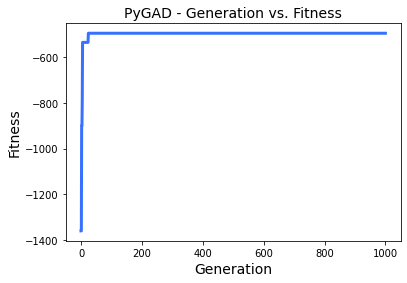

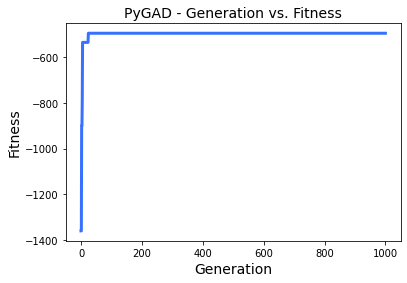

In [3]:
import numpy as np
import pygad

# Combination of number of boards with the prices per board
stack_prices = np.array(
    [
        [1, 10],  # $10 per board
        [5, 5 * 9],  # $9 per board
        [10, 10 * 8],  # $8 per board
        [25, 25 * 7],  # $7 per board
    ]
)

# The minimum number of boards to buy
desired_boards = 67


def fitness_function(solution: np.ndarray, solution_index):
    # We can't have a negative number of boards
    if (solution < 0).any():
        return float('-inf')

    # Make sure we have the minimum number of boards required
    total_area = stack_prices[:, 0] * solution
    if total_area.sum() < desired_boards:
        return float('-inf')

    # Calculate the price of the solution
    price = stack_prices[:, 1] * solution
    # The fitness function maximizes so invert the price
    return - price.sum()


def print_status(instance):
    # Only print the status every 100 iterations
    if instance.generations_completed % 100:
        return

    total = 0
    solution = instance.best_solution()[0]
    # Print the generation, bulk size and the total price
    print(f'Generation {instance.generations_completed}', end=' ')
    for mp, (boards, price) in zip(solution, stack_prices):
        print(f'{mp:2d}x{boards},', end='')
        total += mp * price
    print(f' price: ${total}')


ga_instance = pygad.GA(
    num_generations=1000,
    num_parents_mating=10,
    # Every generation will have 100 solutions
    sol_per_pop=100,
    # We use 1 gene per stack size
    num_genes=stack_prices.shape[0],
    fitness_func=fitness_function,
    on_generation=print_status,
    # We can't buy half a board, so use integers
    gene_type=int,
    # Limit the solution space to our maximum number of boards
    gene_space=np.arange(desired_boards),
    # Limit how large the change in a mutation can be
    random_mutation_min_val=-2,
    random_mutation_max_val=2,
    # Disable crossover since it does not make sense in this case
    crossover_probability=0,
    # Set the number of genes that are allowed to mutate at once
    mutation_num_genes=stack_prices.shape[0] // 2,
)

ga_instance.run()
ga_instance.plot_fitness()
